In [1]:
import numpy as np
import pandas as pd

`brms` is a fantastic package for fitting arbitrary Bayesian models in R with Stan. There is a python port called `pybrms` and in this post we'll fit some distributional regressions.

We will re-create the models in https://cran.r-project.org/web/packages/brms/vignettes/brms_distreg.html.

First we fit a simple unequal variances model, then a zero-inflated Poisson.

### Unequal Variance models

Suppose we have two groups of patients: one which recieves a treatment, and one which recieves a placebo. The treatment may have differing effects for different patients, and as a result the sympthom variance might be higher for the treatment group than the control group. We only simulate the post intervention stage.

In [12]:
treated = {'group':[1]*30, 'sympthom':np.random.normal(loc=1.0, scale=2.0, size=(30,))}

treated = pd.DataFrame(treated)

placebo = {'group':[0]*30, 'sympthom':np.random.normal(loc=1.0, scale=1.0, size=(30,))}

placebo = pd.DataFrame(placebo)

df = pd.concat([treated, placebo], axis=0)

In [13]:
df.head()

,group,sympthom
0,1,1.188952
1,1,2.202919
2,1,-2.825123
3,1,6.446655
4,1,4.314800


In [21]:
from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * df['group'],
                        sigma=np.exp(x_coeff * df['group']), observed=df['sympthom'])

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

INFO:pymc3:Auto-assigning NUTS sampler...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:NUTS: [x, Intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:02<00:00, 2574.64draws/s]


/Users/thomas.kealy/anaconda3/envs/featuretools/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

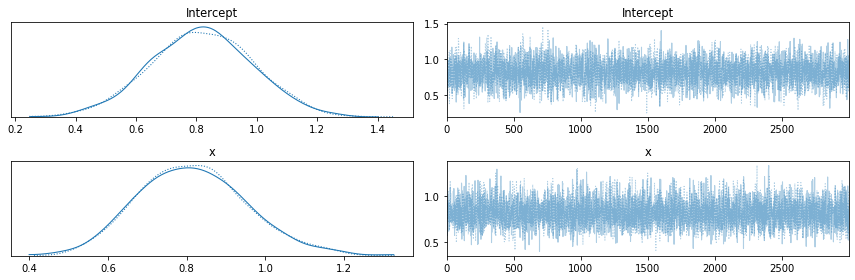

In [22]:
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout();

In [ ]:
import pystan